In [63]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from math import sqrt
import pandas as pd
import numpy as np 
import seaborn as sns


from boruta          import BorutaPy
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn import metrics

from IPython.core.display import HTML

In [22]:
df = pd.read_csv('dataset.csv')

In [23]:
df.head(5)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48
5,BHMBCCMKT01,577,177,2016-10-04 10:26:49
6,BHMBCCMKT01,577,219,2016-10-04 10:59:48
7,BHMBCCMKT01,577,247,2016-10-04 11:25:47
8,BHMBCCMKT01,577,259,2016-10-04 11:59:44
9,BHMBCCMKT01,577,266,2016-10-04 12:29:45


In [24]:
df.dtypes

SystemCodeNumber    object
Capacity             int64
Occupancy            int64
LastUpdated         object
dtype: object

In [75]:
df['SystemCodeNumber'].unique()

array(['BHMBCCMKT01', 'BHMBCCPST01', 'BHMBCCSNH01', 'BHMBCCTHL01',
       'BHMBRCBRG01', 'BHMBRCBRG02', 'BHMBRCBRG03', 'BHMBRTARC01',
       'BHMEURBRD01', 'BHMEURBRD02', 'BHMMBMMBX01', 'BHMNCPHST01',
       'BHMNCPLDH01', 'BHMNCPNHS01', 'BHMNCPNST01', 'BHMNCPPLS01',
       'BHMNCPRAN01', 'Broad Street', 'Bull Ring', 'NIA Car Parks',
       'NIA North', 'NIA South', 'Others-CCCPS105a', 'Others-CCCPS119a',
       'Others-CCCPS133', 'Others-CCCPS135a', 'Others-CCCPS202',
       'Others-CCCPS8', 'Others-CCCPS98', 'Shopping'], dtype=object)

In [25]:
df['date'] = pd.to_datetime(df['LastUpdated'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year']= df['date'].dt.year
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['day_of_week'] = df['date'].dt.dayofweek
df['week_of_year'] = df['date'].dt.weekofyear
df['code_number'] = df['SystemCodeNumber'].apply(lambda x: 1 if x == 'BHMBCCMKT01' else 2 if x=='BHMBCCPST01' else 3 if x=='BHMBCCSNH01'
                                         else 4 if x=='BHMBCCTHL01' else 5 if x=='BHMBRCBRG01' else 6 if x=='BHMBRCBRG02' else 7 if
                                         x=='BHMBRCBRG03' else 8 if x=='BHMBRTARC01' else 9 if x=='BHMEURBRD01' 
                                         else 10 if x=='BHMEURBRD02' else 11 if x=='BHMMBMMBX01' else 12 if x=='BHMNCPHST01'
                                         else 13 if x=='BHMNCPLDH01' else 14 if x=='BHMNCPNHS01' else 15 if x=='BHMNCPNST01'
                                         else 16 if x=='BHMNCPPLS01' else 17 if x=='BHMNCPRAN01' else 18 if x=='Broad Street'
                                         else 19 if x=='Bull Ring'   else 20 if x=='NIA Car Parks' else 21 if x== 'NIA North'
                                         else 22 if x=='NIA South'   else 23 if x=='Others-CCCPS105a' else 24 if x=='Others-CCCPS119a'
                                         else 25 if x=='Others-CCCPS133' else 26 if x=='Others-CCCPS135a' else 27 if x=='Others-CCCPS202'
                                         else 28 if x=='Others-CCCPS8' else 29 if x=='Others-CCCPS98' else 30)
df['occupancy_rate'] = df['Occupancy']/df['Capacity']

/tmp/ipykernel_5113/4249010788.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_of_year'] = df['date'].dt.weekofyear


In [26]:
df1 = df.drop(['SystemCodeNumber' , 'Capacity' , 'Occupancy' , 'LastUpdated' , 'date'],axis=1)

In [27]:
df1.head()

,day,month,year,hour,minute,day_of_week,week_of_year,code_number,occupancy_rate
0,4,10,2016,7,59,1,40,1,0.105719
1,4,10,2016,8,25,1,40,1,0.110919
2,4,10,2016,8,59,1,40,1,0.138648
3,4,10,2016,9,32,1,40,1,0.185442
4,4,10,2016,9,59,1,40,1,0.259965


/home/erickfog/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


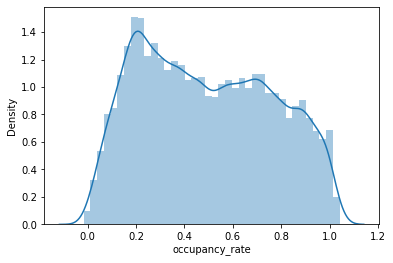

In [28]:
sns.distplot(df1['occupancy_rate']);

/home/erickfog/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


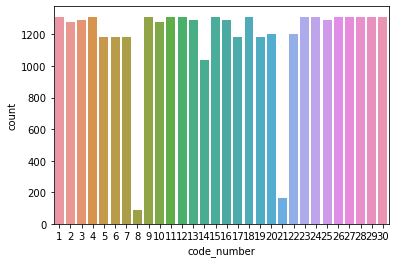

In [29]:
sns.countplot(df1['code_number']);

/home/erickfog/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


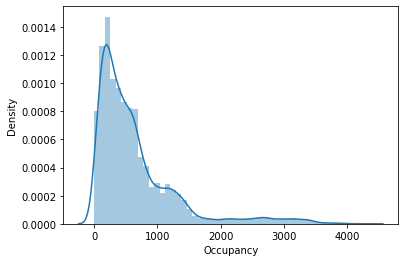

In [30]:
sns.distplot(df['Occupancy']);

In [64]:
seed=50
train_set, test_set = train_test_split(df1, test_size=0.3, shuffle=True, random_state=seed)
X = train_set.drop(['occupancy_rate'], axis='columns')
y = train_set['occupancy_rate']

X_test = test_set.drop(['occupancy_rate'] , axis='columns')
y_test = test_set['occupancy_rate']

In [65]:
from sklearn.neighbors import KNeighborsRegressor

y_pred = cross_val_predict(KNeighborsRegressor(), X, y, cv=5)
print('MSE: {}'.format(metrics.mean_squared_error(y, y_pred, squared=True)))
print('RMSE: {}' .format(sqrt(metrics.mean_squared_error(y,y_pred,squared=True))))
print('MAE: {}' .format(metrics.mean_absolute_error(y,y_pred)))
print('R2: {}' .format(metrics.r2_score(y, y_pred)))

MSE: 0.0349953510787499
RMSE: 0.1870704441614172
MAE: 0.15016283092569685
R2: 0.5245475916442455


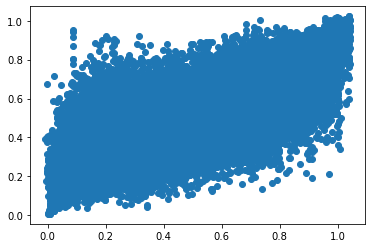

In [66]:
plt.scatter(y,y_pred)

In [67]:
from sklearn.ensemble import RandomForestRegressor
y_pred = cross_val_predict(RandomForestRegressor(), X, y, cv=5)
print('MSE: {}'.format(metrics.mean_squared_error(y, y_pred, squared=True)))
print('RMSE: {}' .format(sqrt(metrics.mean_squared_error(y,y_pred,squared=True))))
print('MAE: {}' .format(metrics.mean_absolute_error(y,y_pred)))
print('R2: {}' .format(metrics.r2_score(y, y_pred)))

MSE: 0.0020757930375215317
RMSE: 0.04556087178184293
MAE: 0.028423564899893495
R2: 0.9717979454837641


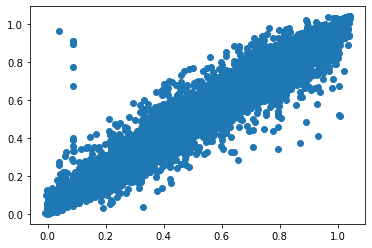

In [68]:
plt.scatter(y,y_pred)

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
clf_gradboost = GradientBoostingRegressor(#loss='squared_error', 
                                           max_depth=8, 
                                           learning_rate=0.1, 
                                           n_estimators=200,
                                           max_leaf_nodes=None)
y_pred = cross_val_predict(clf_gradboost, X, y, cv=5)
print('MSE: {}'.format(metrics.mean_squared_error(y, y_pred, squared=True)))
print('RMSE: {}' .format(sqrt(metrics.mean_squared_error(y,y_pred,squared=True))))
print('MAE: {}' .format(metrics.mean_absolute_error(y,y_pred)))
print('R2: {}' .format(metrics.r2_score(y, y_pred)))

MSE: 0.0015141907844136218
RMSE: 0.03891260444140975
MAE: 0.026168927799368403
R2: 0.9794279630588789


Text(0, 0.5, 'Predict')

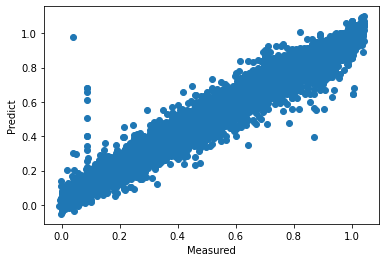

In [71]:
plt.scatter(y,y_pred)
plt.xlabel("Measured")
plt.ylabel("Predict")

Text(0, 0.5, 'Predicted')

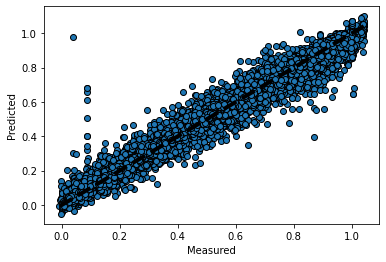

In [73]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")